In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from betaincder import betainc

In [2]:
def sigmoid(x, c):
    
    return 1 / (1 + np.exp(-c*(x-0.5)))

In [3]:
def entropy(x):
    
    return -x * np.log(x) - (1-x) * np.log(1-x)

In [4]:
def area(c):
    
    return (np.log((1+np.exp(c/2))/2))/c

In [5]:
def error(x, c):
    
    return -c * np.log(1/x - 1)

In [14]:
cs = np.arange(0.01, 1, 0.01)
x = np.arange(0.01, 1, 0.01)

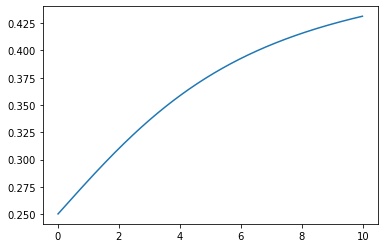

In [15]:
plt.plot(cs, area(cs))

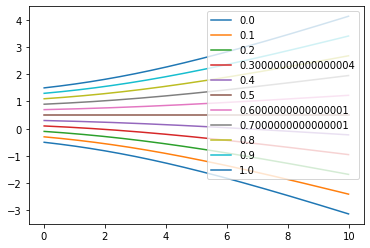

In [16]:
a = area(cs)

for r in np.arange(0, 1.1, 0.1):
    plt.plot(cs, (r - a)/(1 - 2*a), label=r)

plt.legend()

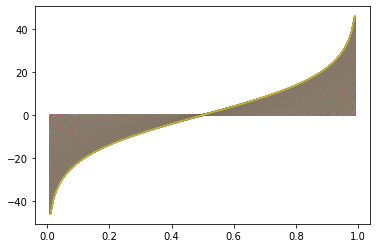

In [17]:
for c in cs:
    plt.plot(x, error(x, c))

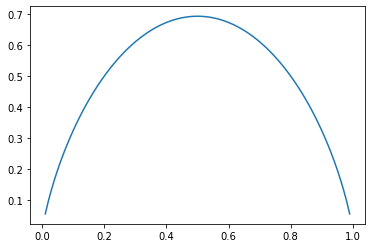

In [18]:
plt.plot(x, entropy(x))

-0.32573900920385723


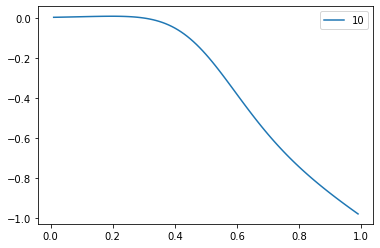

In [42]:
for c in [10]:
    plt.plot(x, -sigmoid(x, c)* x + entropy(sigmoid(x, c))/c, label=c)
# plt.yscale("log")
plt.legend()
print(sum((-sigmoid(x, c)* x + entropy(sigmoid(x, c))/c))/len(x))

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  


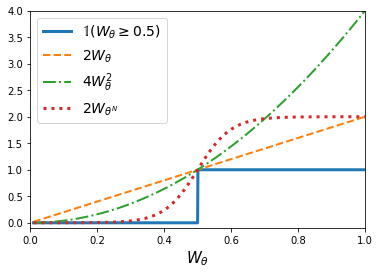

In [3]:
x = np.arange(0.01, 1.01, 0.001)

plt.plot(x, [0 if i <= 0.5 else 1 for i in x], label=r'$\mathbb{1}(W_{\theta} \geq 0.5)$', linewidth=3)
plt.plot(x, 2*x, label=r'$2W_{\theta}$', linewidth=2, linestyle="--")
plt.plot(x, 4*x**2, label=r'$4W_{\theta}^2$', linewidth=2, linestyle="-.")
# plt.plot(x, np.exp(4*(x-0.5)), label=r'$\exp(4(W_{\theta}-0.5))$', linewidth=3, linestyle=(0, (3, 5, 1, 5)))
plt.plot(x, 2*sigmoid(x, 20), label=r'$2W_{\theta^N}$', linewidth=3, linestyle=":")

plt.xlabel(r'$W_{\theta}$', fontsize=15)
plt.xlim(0, 1)
plt.ylim(-0.1, 4)
plt.legend(fontsize=14)

plt.savefig("moments.pdf", bbox="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


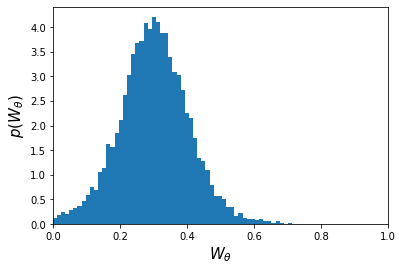

In [113]:
loc, scale = 0.3, 0.06
s = np.random.logistic(loc, scale, 10000)

count, bins, ignored = plt.hist(s, bins=100, density=True)

plt.xlabel(r'$W_{\theta}$', fontsize=15)
plt.ylabel(r'$p(W_{\theta})$', fontsize=15)
plt.xlim(0, 1)

plt.savefig("pdf.pdf", bbox="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  del sys.path[0]


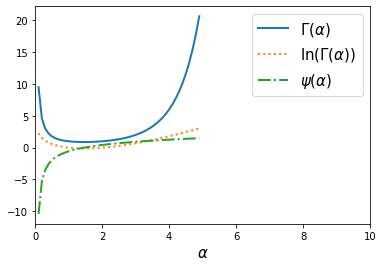

In [5]:
from scipy.special import gamma, digamma, polygamma

a = np.arange(0, 5, 0.1)

plt.plot(a, gamma(a), label=r'$\Gamma(\alpha)$', linewidth=2)
plt.plot(a, np.log(gamma(a)), label=r'$\ln(\Gamma(\alpha))$', linewidth=2, linestyle=":")
plt.plot(a, digamma(a), label=r'$\psi(\alpha)$', linewidth=2, linestyle="-.")
# plt.plot(a, polygamma(1, a), label=r'$\psi\'(\alpha)$')
plt.legend(fontsize=15)
plt.xlim(0, 10)
plt.xlabel(r'$\alpha$', fontsize=15)
# plt.yscale("log")
plt.savefig("gamma.pdf", bbox="tight")

In [3]:
""" code taken from https://gist.github.com/tboggs/8778945"""
import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_AREA = 0.5 * 1 * 0.75**0.5
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

In [5]:
# For each corner of the triangle, the pair of other corners
_pairs = [_corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    coords = np.array([tri_area(xy, p) for p in _pairs]) / _AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                                for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='Oranges', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, 'k-', linewidth=1)
    for c, label in zip([[-0.09, 0], [1, 0], [0.45, 0.75**0.5+0.01]], [r"$h_1$", r"$h_2$", r"$h_3$"]):
        plt.text(c[0], c[1], label)
    
    plt.text(0.6, 0.2, r"$\theta$", fontsize=15)
    plt.scatter(0.68, 0.2, s=20, c='k', marker='x', clip_on=False)

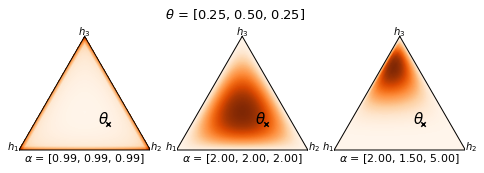

In [11]:
f = plt.figure(figsize=(8, 2.5))
alphas = [[0.99] * 3,
          [2] * 3,
          [2, 1.5, 5]]
for (i, alpha) in enumerate(alphas):
    plt.subplot(1, len(alphas), i + 1)
    dist = Dirichlet(alpha)
    draw_pdf_contours(dist, subdiv=5, border=True)
    title = r'$\alpha$ = [%.2f, %.2f, %.2f]' % tuple(alpha)
    plt.title(title, fontdict={'fontsize': 11}, y=-0.05)
plt.suptitle(r'$\theta$ = [%.2f, %.2f, %.2f]' % (0.25, 0.5, 0.25), fontsize=13)
#     plot_points(dist.sample(5000))
plt.savefig('simplex.png', bbox_inches="tight", dpi=300)

[ 1.5   1.48  1.46  1.44  1.42  1.4   1.38  1.36  1.34  1.32  1.3   1.28
  1.26  1.24  1.22  1.2   1.18  1.16  1.14  1.12  1.1   1.08  1.06  1.04
  1.02  1.    0.98  0.96  0.94  0.92  0.9   0.88  0.86  0.84  0.82  0.8
  0.78  0.76  0.74  0.72  0.7   0.68  0.66  0.64  0.62  0.6   0.58  0.56
  0.54  0.52  0.5   0.48  0.46  0.44  0.42  0.4   0.38  0.36  0.34  0.32
  0.3   0.28  0.26  0.24  0.22  0.2   0.18  0.16  0.14  0.12  0.1   0.08
  0.06  0.04  0.02  0.   -0.02 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16
 -0.18 -0.2  -0.22 -0.24 -0.26 -0.28 -0.3  -0.32 -0.34 -0.36 -0.38 -0.4
 -0.42 -0.44 -0.46 -0.48 -0.5 ]


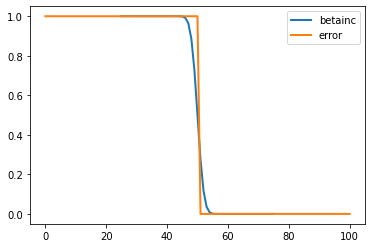

In [58]:
M = 100
c = np.arange(M+1)
print(2 * (M-c)/M - 0.5)
b = [betainc(2*(M-i)/M - 0.5, i, M-i) for i in c]
plt.plot(c, b, linewidth=2, label="betainc")
plt.plot(c, c <= M-c, linewidth=2, label="error")
plt.legend()

0.6515151515151515


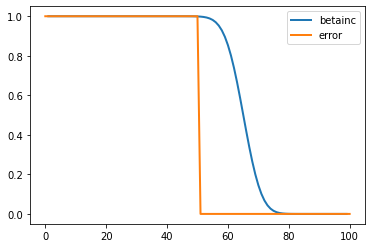

In [56]:
M = 100
c = np.arange(M+1)

for gamma in np.linspace(0.5, 1, 100):
    new = betainc(gamma, M//2, M//2)
    if np.isclose(new, 1., 1e-3):
        break

print(gamma)
b = [betainc(gamma, i, M-i) for i in c]
plt.plot(c, b, linewidth=2, label="betainc")
plt.plot(c, c <= M-c, linewidth=2, label="error")
plt.legend()

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


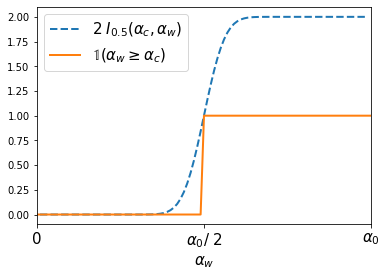

In [20]:
M = 100
c = np.arange(M+1)
b = [betainc(0.5, M-i, i)*2 for i in c]
plt.plot(c, b, linewidth=2, linestyle="--", label=r"$2\;I_{0.5}(\alpha_c, \alpha_w)$")
plt.plot(c, c >= M-c, linewidth=2, label=r"$\mathbb{1}(\alpha_w \geq \alpha_c)$")
plt.legend(fontsize=15)
plt.xlabel(r"$\alpha_w$", fontsize=15)
plt.xticks([0, 50, 100], [0, r"$\alpha_0 /\; 2$", r"$\alpha_0$"], fontsize=15)
plt.xlim(0, 100)
plt.savefig("expectedMV.pdf", bbox="tight")